In [0]:
import pandas as pd

In [0]:
pip install openpyxl

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
df = pd.read_excel(r"/dbfs/FileStore/shared_uploads/rsanku@saintpeters.edu/Online_Retail.xlsx")

In [0]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [0]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Text(0.5, 1.0, 'Top 10 products by quantity')

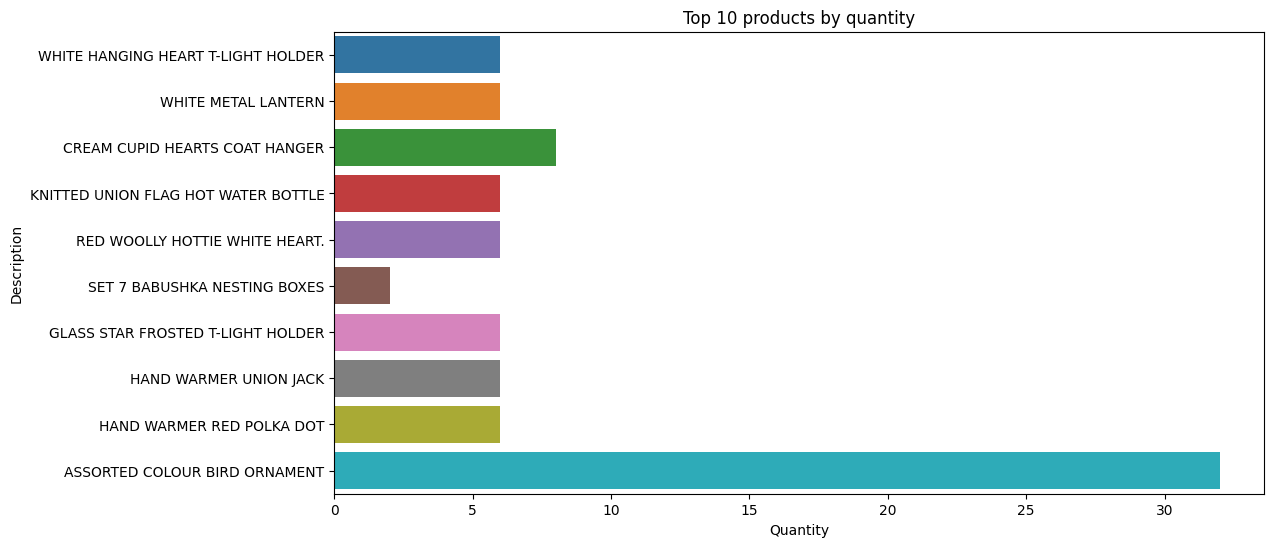

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
# top 10 products by quantity
plt.figure(figsize=(12,6))
df1=df[['Description','Quantity']][:10]
sns.barplot(x=df1['Quantity'],y=df1['Description'])
plt.title('Top 10 products by quantity')

In [0]:
rfm=df.drop(columns=["StockCode","Description","Country"])

In [0]:
rfm.head(5)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [0]:
rfm.nunique()

InvoiceNo      25900
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
dtype: int64

In [0]:
rfm.notnull().value_counts()

InvoiceNo  Quantity  InvoiceDate  UnitPrice  CustomerID
True       True      True         True       True          406829
                                             False         135080
dtype: int64

In [0]:
rfm=rfm.dropna()

In [0]:
rfm.notnull().value_counts()

InvoiceNo  Quantity  InvoiceDate  UnitPrice  CustomerID
True       True      True         True       True          406829
dtype: int64

In [0]:
rfm.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [0]:
rfm = rfm[~rfm['InvoiceNo'].str.contains('C', na = False)]
rfm = rfm[rfm['Quantity'] > 0]

In [0]:
rfm.shape

(397924, 5)

In [0]:
rfm.dtypes


InvoiceNo              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
dtype: object

In [0]:
rfm['CustomerID'] = rfm['CustomerID'].astype(str)


In [0]:
rfm.describe()

,Quantity,UnitPrice
count,397924.000000,397924.000000
mean,13.021823,3.116174
std,180.420210,22.096788
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [0]:
rfm.dtypes

InvoiceNo              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
dtype: object

In [0]:
#Total Price
rfm["TotalPrice"] = rfm["Quantity"] * rfm["UnitPrice"]

In [0]:
print(rfm['InvoiceDate'].max())

2011-12-09 12:50:00


In [0]:
import datetime as dt
today_date = dt.datetime(2011,12,11)

rfm_Score = rfm.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                           'InvoiceNo': lambda x: x.nunique(),
                                           'TotalPrice': lambda x: x.sum()})

rfm_Score.columns = ['recency', 'frequency', 'monetary']
#rfm_Score['monetary'] = rfm_Score['monetary'].apply(lambda x: x if x > 0 else 0)
rfm_Score = rfm_Score.reset_index()

rfm_Score.head()


,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [0]:
rfm_Score["Recency_Score"]  = pd.qcut(rfm_Score['recency'], 3, [3, 2, 1])
rfm_Score["Frequency_Score"]  = pd.qcut(rfm_Score['frequency'].rank(method="first"), 3, [1, 2, 3])
rfm_Score["Monetary_Score"]  = pd.qcut(rfm_Score['monetary'], 3, [1, 2, 3])
rfm_Score["RFM_Score"] = rfm_Score["Recency_Score"].astype(str) + rfm_Score["Frequency_Score"].astype(str) + rfm_Score["Monetary_Score"].astype(str)
rfm_Score


,CustomerID,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,3,113
1,12347.0,3,7,4310.00,3,3,3,333
2,12348.0,76,4,1797.24,2,2,3,223
3,12349.0,19,1,1757.55,3,1,3,313
4,12350.0,311,1,334.40,1,1,1,111
...,...,...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,1,2,1,121
4335,18281.0,181,1,80.82,1,2,1,121
4336,18282.0,8,2,178.05,3,2,1,321
4337,18283.0,4,16,2094.88,3,3,3,333


In [0]:
def segment_customers(rfm_score):
    if rfm_score in ['333', '332', '323']:
        return 'Best Customers'
    elif rfm_score in ['321', '322', '331', '232', '233']:
        return 'Loyal'
    elif rfm_score in ['312', '313', '311', '222', '223']:
        return 'Recent'
    elif rfm_score in ['213', '221', '123', '132', '133']:
        return 'Needs attention'
    elif rfm_score in ['231', '212', '122', '131', '211']:
        return 'At risk'
    elif rfm_score in ['111', '112', '113', '121']:
        return 'Inactive'
    
rfm_Score['Segment'] = rfm_Score['RFM_Score'].apply(segment_customers)


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2035931128988439>:15
     12     elif rfm_score in ['111', '112', '113', '121']:
     13         return 'Inactive'
---> 15 rfm_Score['Segment'] = rfm_Score['RFM_Score'].apply(segment_customers)

NameError: name 'rfm_Score' is not defined

<AxesSubplot:title={'center':'Customer Segmentation'}, xlabel='Segment', ylabel='Count'>

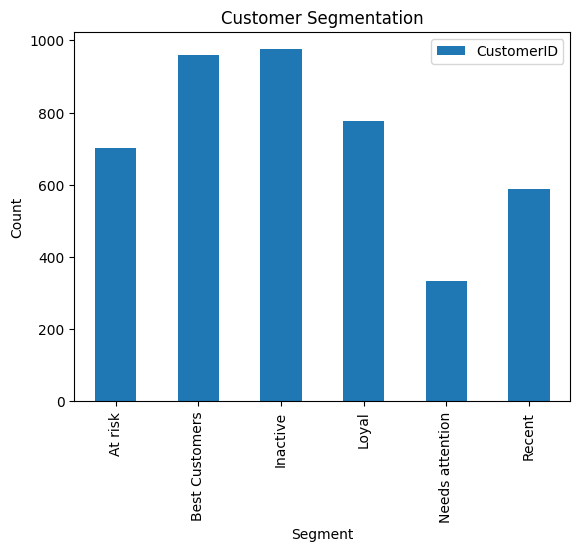

In [0]:
# Group the rfm_Score dataframe by 'Segment' and count the number of unique 'CustomerID' in each segment
df_segment_count = rfm_Score.groupby('Segment').agg({'CustomerID':'count'})

# Visualize the count of customers in each segment using a bar chart
df_segment_count.plot(kind='bar', title='Customer Segmentation', xlabel='Segment', ylabel='Count')


<AxesSubplot:title={'center':'Top Customer Segments'}, xlabel='Segment', ylabel='Count'>

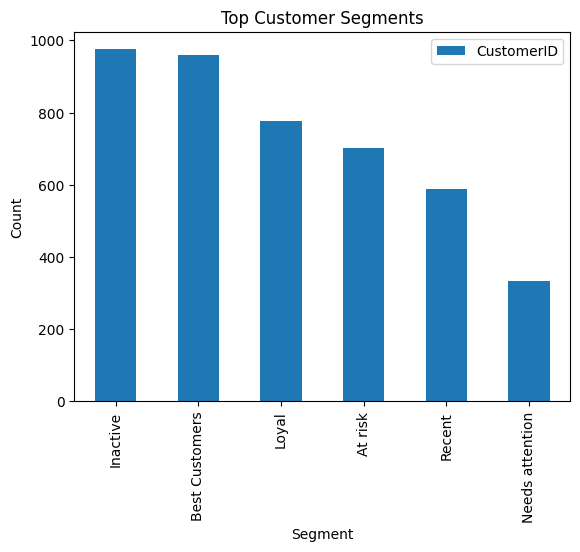

In [0]:
# Group the rfm_Score dataframe by 'Segment' and count the number of unique 'CustomerID' in each segment
df_segment_count = rfm_Score.groupby('Segment').agg({'CustomerID':'count'})

# Sort the segments by count in descending order
df_segment_count = df_segment_count.sort_values('CustomerID', ascending=False)

# Take the top 10 segments
top_segments = df_segment_count.head(10)

# Visualize the top segments using a bar chart
top_segments.plot(kind='bar', title='Top Customer Segments', xlabel='Segment', ylabel='Count')


In [0]:
rfm_Score.sort_values('RFM_Score', ascending=False).head(10)


,CustomerID,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
981,13668.0,3,21,6363.59,3,3,3,333,Best Customers
1003,13704.0,6,9,2308.06,3,3,3,333,Best Customers
1008,13709.0,4,13,6328.05,3,3,3,333,Best Customers
3110,16592.0,5,16,4113.68,3,3,3,333,Best Customers
3097,16570.0,16,10,3738.40,3,3,3,333,Best Customers
3089,16558.0,1,20,8338.49,3,3,3,333,Best Customers
3080,16549.0,11,10,4154.64,3,3,3,333,Best Customers
3076,16539.0,3,4,1388.81,3,3,3,333,Best Customers
1028,13735.0,25,4,2885.24,3,3,3,333,Best Customers
3071,16531.0,23,7,1244.59,3,3,3,333,Best Customers


In [0]:
rfm_Score.sort_values('RFM_Score', ascending=True).head(10)


,CustomerID,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
3775,17514.0,129,1,208.65,1,1,1,111,Inactive
1531,14436.0,99,1,89.06,1,1,1,111,Inactive
3481,17094.0,323,1,302.00,1,1,1,111,Inactive
2659,15973.0,367,1,307.82,1,1,1,111,Inactive
965,13645.0,121,1,252.10,1,1,1,111,Inactive
3487,17102.0,262,1,25.50,1,1,1,111,Inactive
1532,14437.0,366,1,63.00,1,1,1,111,Inactive
502,13002.0,319,1,120.95,1,1,1,111,Inactive
962,13642.0,216,1,354.80,1,1,1,111,Inactive
3021,16461.0,178,1,151.42,1,1,1,111,Inactive


In [0]:
rfm_Score[rfm_Score["Segment"] == "Loyal"]


,CustomerID,recency,frequency,monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
5,12352.0,37,8,2506.04,2,3,3,233,Loyal
11,12358.0,2,2,1168.06,3,2,2,322,Loyal
25,12375.0,11,2,457.50,3,2,2,322,Loyal
48,12407.0,50,5,1708.12,2,3,3,233,Loyal
49,12408.0,33,5,2888.55,2,3,3,233,Loyal
...,...,...,...,...,...,...,...,...,...
4311,18246.0,24,2,596.10,3,2,2,322,Loyal
4313,18249.0,18,1,95.34,3,2,1,321,Loyal
4318,18257.0,40,8,2337.63,2,3,3,233,Loyal
4329,18273.0,3,3,204.00,3,2,1,321,Loyal


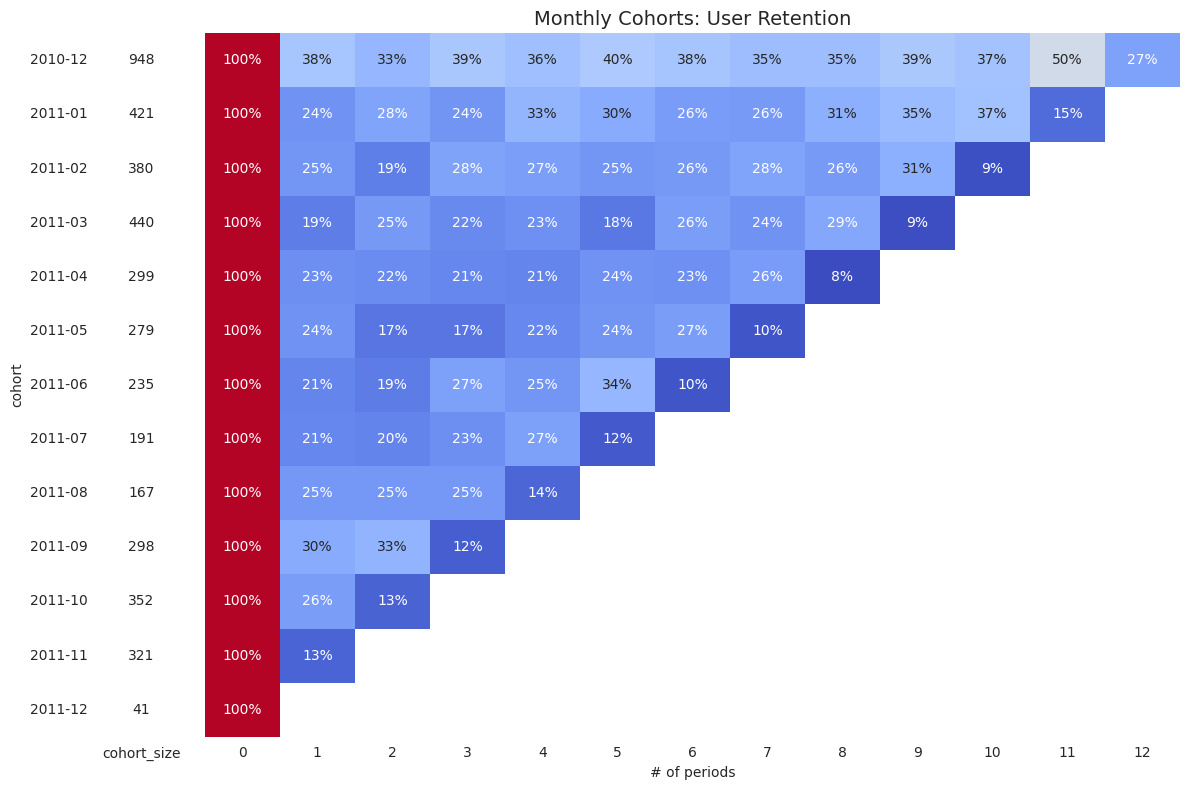

In [0]:

# Import necessary libraries
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def CohortAnalysis(dataframe):

    data = dataframe.copy()
    data = data[["CustomerID", "InvoiceNo", "InvoiceDate"]].drop_duplicates()
    data["order_month"] = data["InvoiceDate"].dt.to_period("M")
    data["cohort"] = (
        data.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")
    )
    cohort_data = (
        data.groupby(["cohort", "order_month"])
        .agg(n_customers=("CustomerID", "nunique"))
        .reset_index(drop=False)
    )
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(
        attrgetter("n")
    )
    cohort_pivot = cohort_data.pivot_table(
        index="cohort", columns="period_number", values="n_customers"
    )
    cohort_size = cohort_pivot.iloc[:, 0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(
            1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
        )
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),
            annot=True,
            cbar=False,
            fmt=".0%",
            cmap="coolwarm",
            ax=ax[1],
        )
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
        ax[1].set(xlabel="# of periods", ylabel="")
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(
            pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),
            annot=True,
            cbar=False,
            fmt="g",
            cmap=white_cmap,
            ax=ax[0],
        )
        fig.tight_layout()
    
CohortAnalysis(df)


In [0]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
# Item Based collabartive filtering
transaction_data = df[['InvoiceNo', 'Description']]


In [0]:
transaction_data.drop_duplicates(inplace=True)

<command-2450616556192353>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data.drop_duplicates(inplace=True)


In [0]:
transaction_data = df[['InvoiceNo', 'Description']].copy()  # Create a copy of the DataFrame

# Add a column to indicate presence of the item in the transaction
transaction_data['Count'] = 1  

# Pivot table to convert the data into transaction-item matrix
transaction_data = transaction_data.pivot_table(index='InvoiceNo', columns='Description', values='Count', aggfunc=lambda x: ' '.join(x.dropna().astype(str).unique()), fill_value=0)


In [0]:
transaction_data.head(10)

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
transaction_data.tail(10)

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
C581464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
item_similarities = cosine_similarity(transaction_data.T)
item_similarities


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [0]:
def get_top_similar_items(item_name, item_similarities, n=5):
    item_idx = transaction_data.columns.get_loc(item_name)
    similar_items = list(enumerate(item_similarities[item_idx]))
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)
    top_similar_items = similar_items[1:n+1]  # Exclude the item itself from the list
    top_similar_items_names = [transaction_data.columns[i[0]] for i in top_similar_items]
    return top_similar_items_names

In [0]:
top_similar_items = get_top_similar_items("WHITE HANGING HEART T-LIGHT HOLDER", item_similarities)
print("Top 5 similar items to 'WHITE HANGING HEART T-LIGHT HOLDER':")
for item in top_similar_items:
    print(item)

Top 5 similar items to 'WHITE HANGING HEART T-LIGHT HOLDER':
RED HANGING HEART T-LIGHT HOLDER
CANDLEHOLDER PINK HANGING HEART
WOODEN PICTURE FRAME WHITE FINISH
NATURAL SLATE HEART CHALKBOARD 
HEART OF WICKER LARGE


In [0]:
top_similar_items = get_top_similar_items("RED HANGING HEART T-LIGHT HOLDER", item_similarities)
print("Top 5 similar items to 'RED HANGING HEART T-LIGHT HOLDER':")
for item in top_similar_items:
    print(item)

Top 5 similar items to 'RED HANGING HEART T-LIGHT HOLDER':
WHITE HANGING HEART T-LIGHT HOLDER
CANDLEHOLDER PINK HANGING HEART
HEART OF WICKER LARGE
PINK HANGING HEART T-LIGHT HOLDER
HEART OF WICKER SMALL


In [0]:
top_similar_items = get_top_similar_items("KNITTED UNION FLAG HOT WATER BOTTLE", item_similarities)
print("Top 5 similar items to 'KNITTED UNION FLAG HOT WATER BOTTLE':")
for item in top_similar_items:
    print(item)

Top 5 similar items to 'KNITTED UNION FLAG HOT WATER BOTTLE':
RED WOOLLY HOTTIE WHITE HEART.
WHITE SKULL HOT WATER BOTTLE 
CHOCOLATE HOT WATER BOTTLE
ENGLISH ROSE HOT WATER BOTTLE
HOT WATER BOTTLE I AM SO POORLY


In [0]:
# Aggregate quantity sold for each item
top_selling_items = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the items by quantity in descending order
top_selling_items = top_selling_items.sort_values(by='Quantity', ascending=False)

# Display the top selling items
print("Top Selling Items:")
print(top_selling_items.head(10))  # Display the top 10 selling items


Top Selling Items:
                             Description  Quantity
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866             JUMBO BAG RED RETROSPOT     47363
244        ASSORTED COLOUR BIRD ORNAMENT     36381
2740                      POPCORN HOLDER     36334
2395     PACK OF 72 RETROSPOT CAKE CASES     36039
3918  WHITE HANGING HEART T-LIGHT HOLDER     35317
2803                  RABBIT NIGHT LIGHT     30680
2161             MINI PAINT SET VINTAGE      26437
2361          PACK OF 12 LONDON TISSUES      26315
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24753


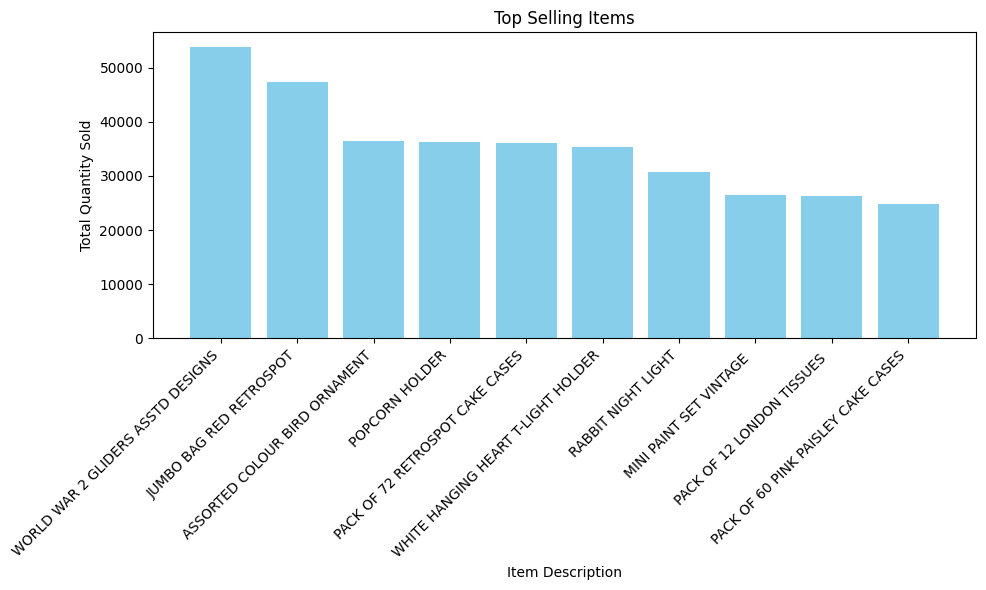

In [0]:
import matplotlib.pyplot as plt

# Plot the top selling items
plt.figure(figsize=(10, 6))
plt.bar(top_selling_items['Description'][:10], top_selling_items['Quantity'][:10], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top Selling Items')
plt.tight_layout()
plt.show()


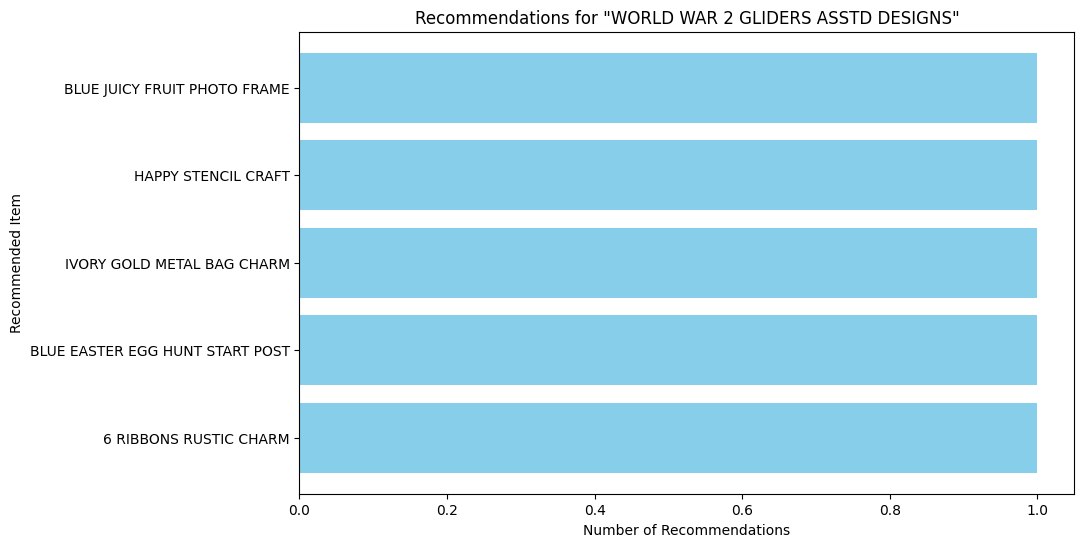

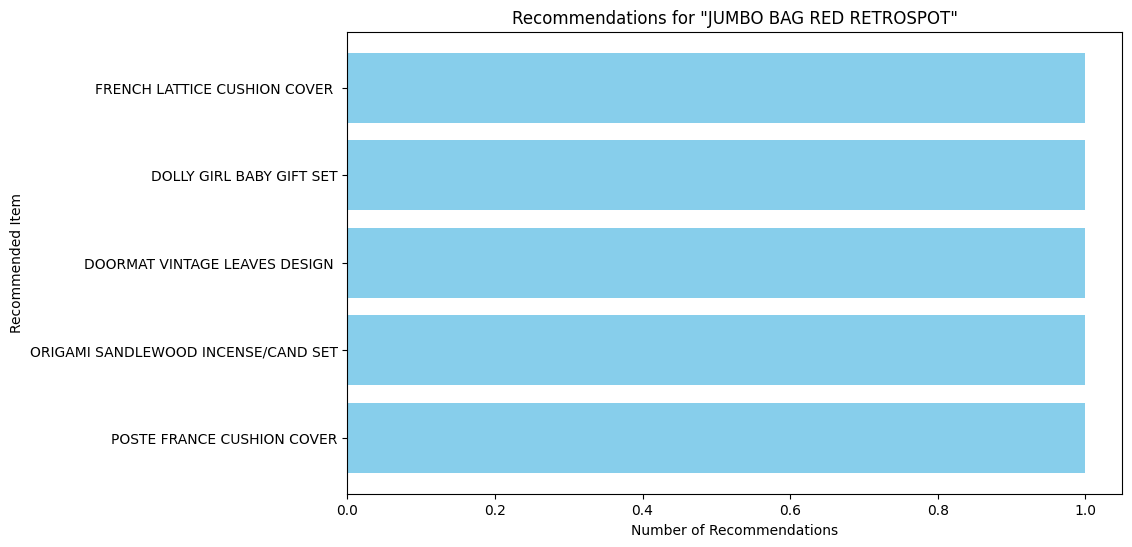

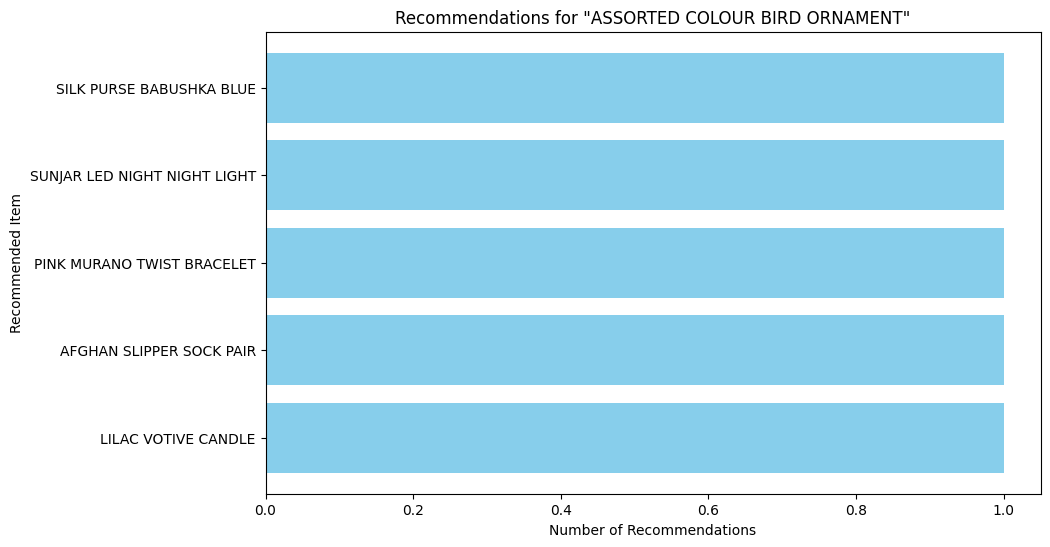

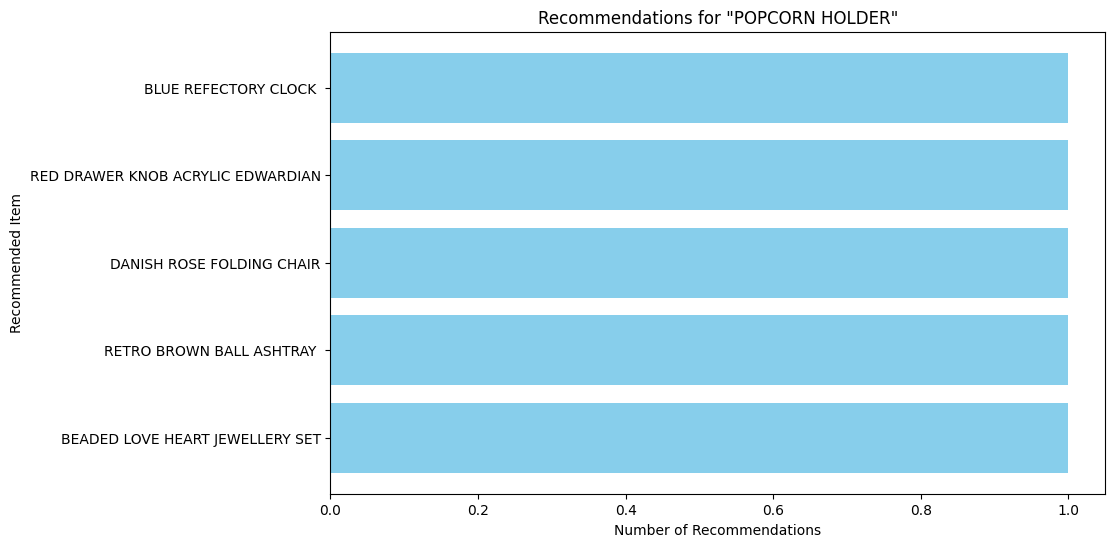

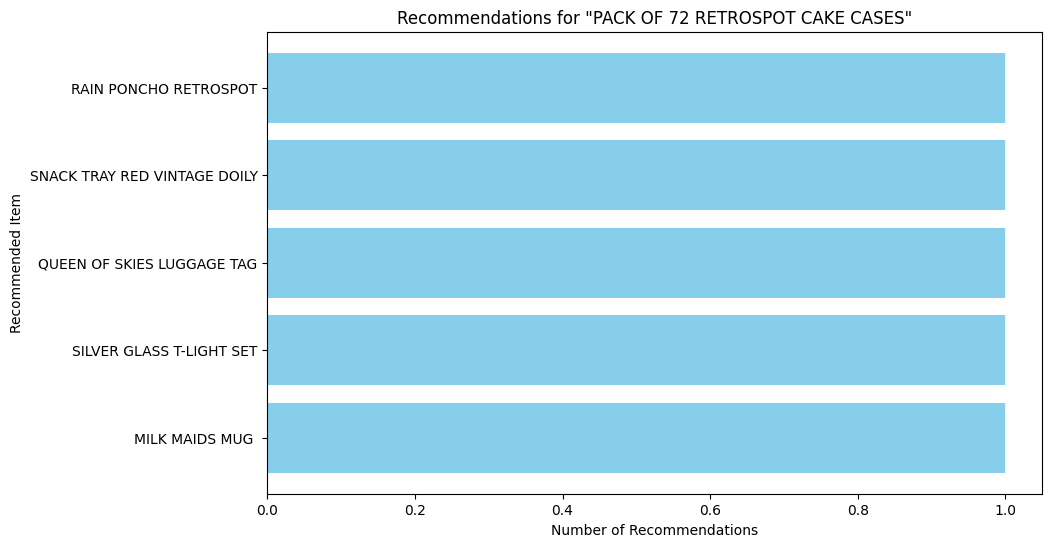

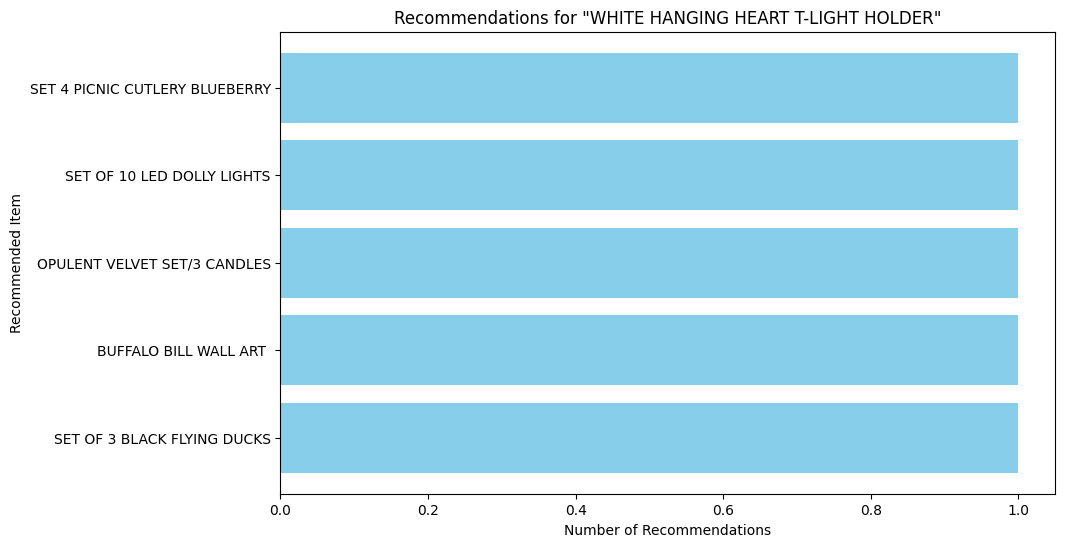

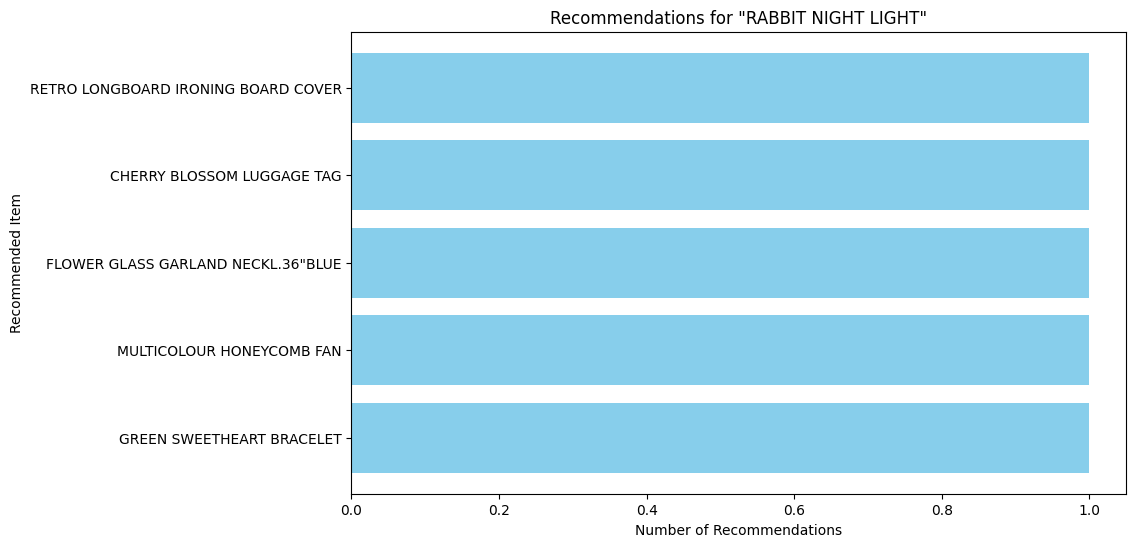

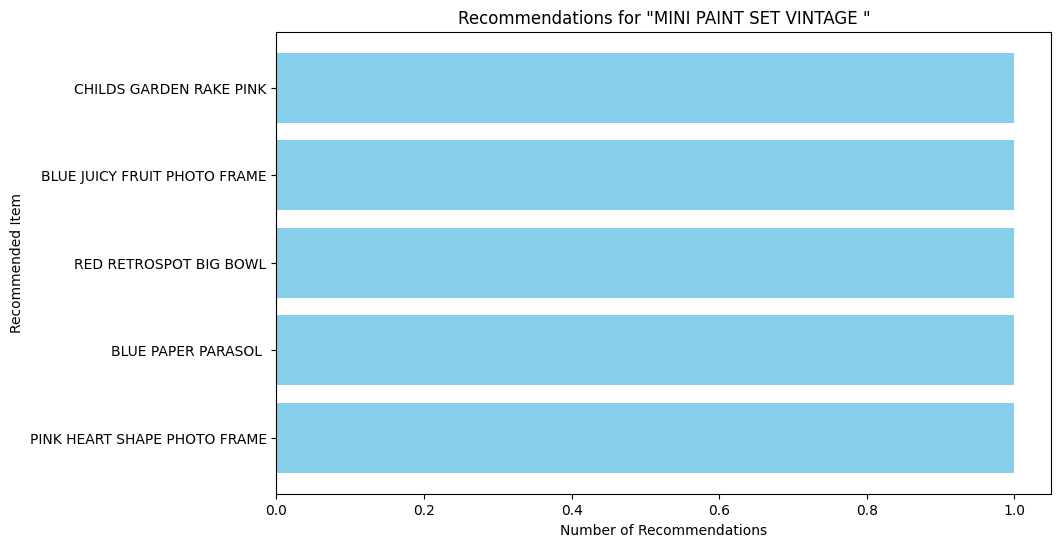

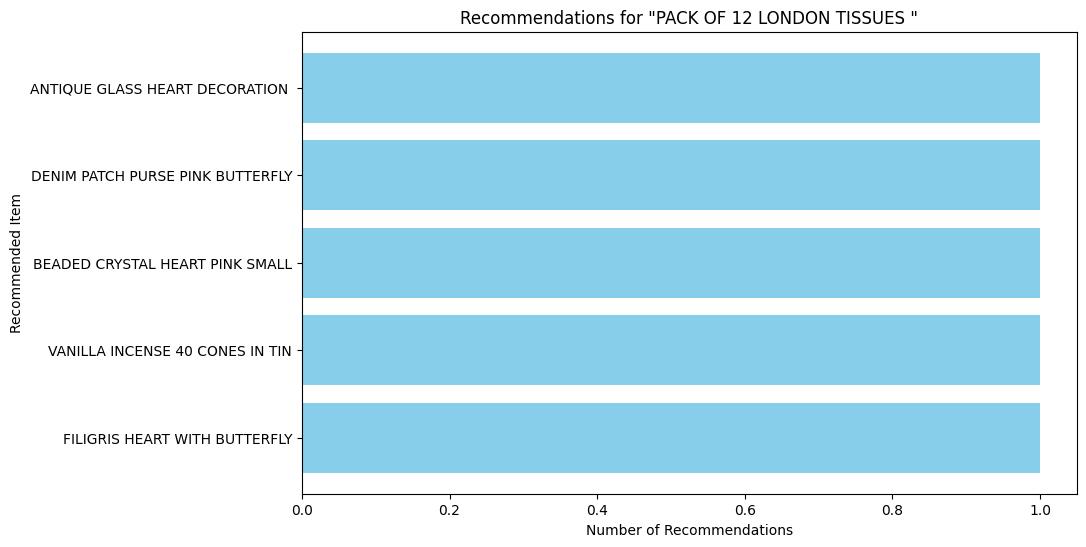

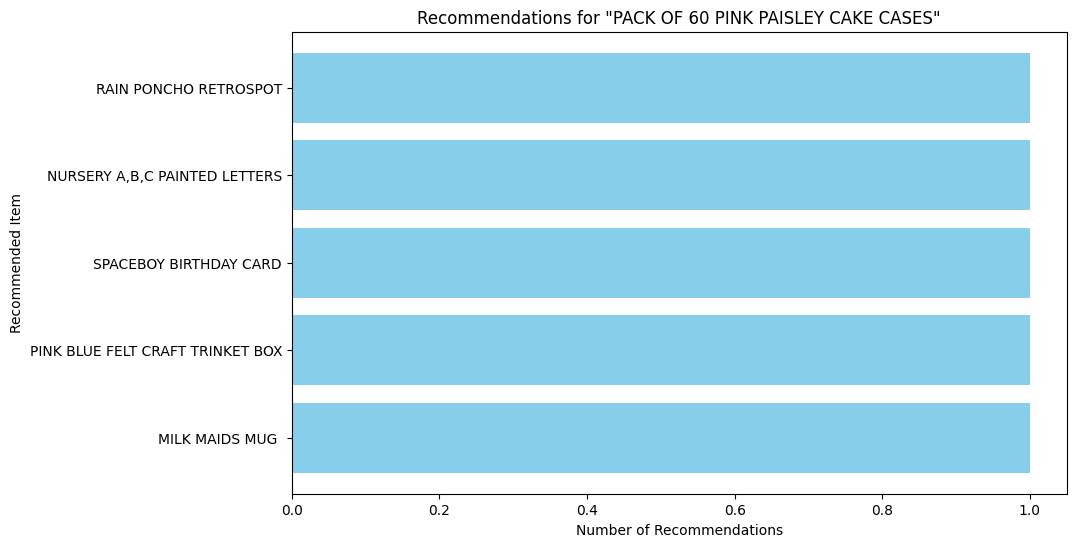

In [0]:
# Define a function to visualize recommendations for each top selling item individually
def plot_recommendations_for_each_top_selling_item(top_selling_item, recommendations):
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations, [1] * len(recommendations), color='skyblue')
    plt.xlabel('Number of Recommendations')
    plt.ylabel('Recommended Item')
    plt.title(f'Recommendations for "{top_selling_item}"')
    plt.gca().invert_yaxis()
    plt.show()

# Visualize recommendations for each top selling item individually
for top_selling_item, recommendations in top_selling_item_recommendations.items():
    plot_recommendations_for_each_top_selling_item(top_selling_item, recommendations)


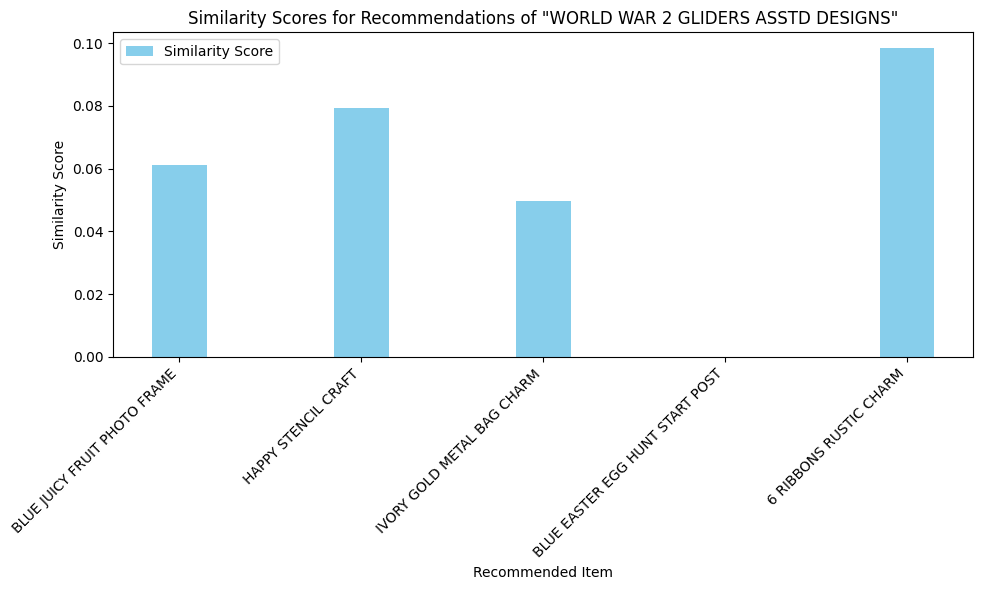

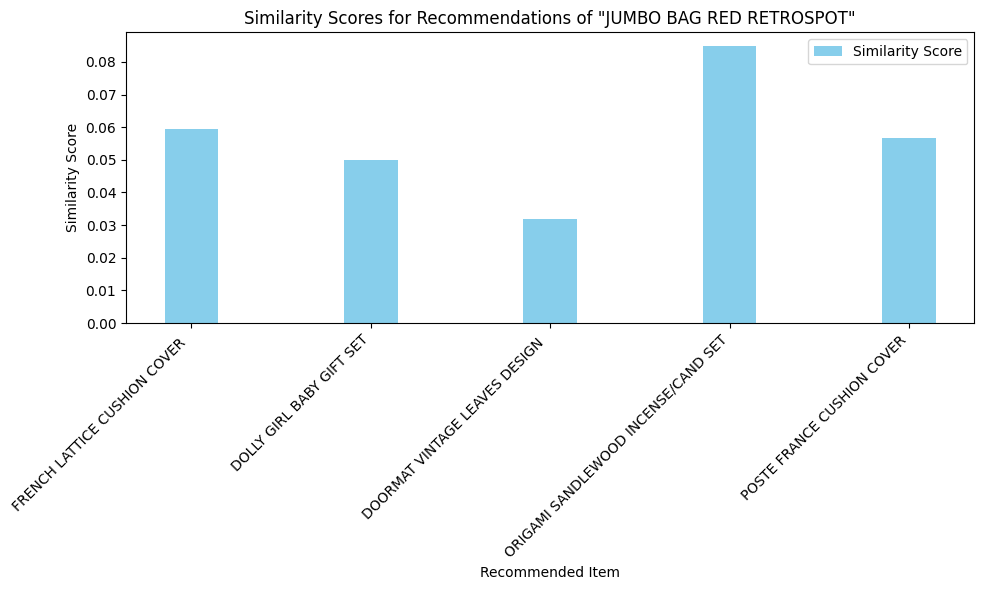

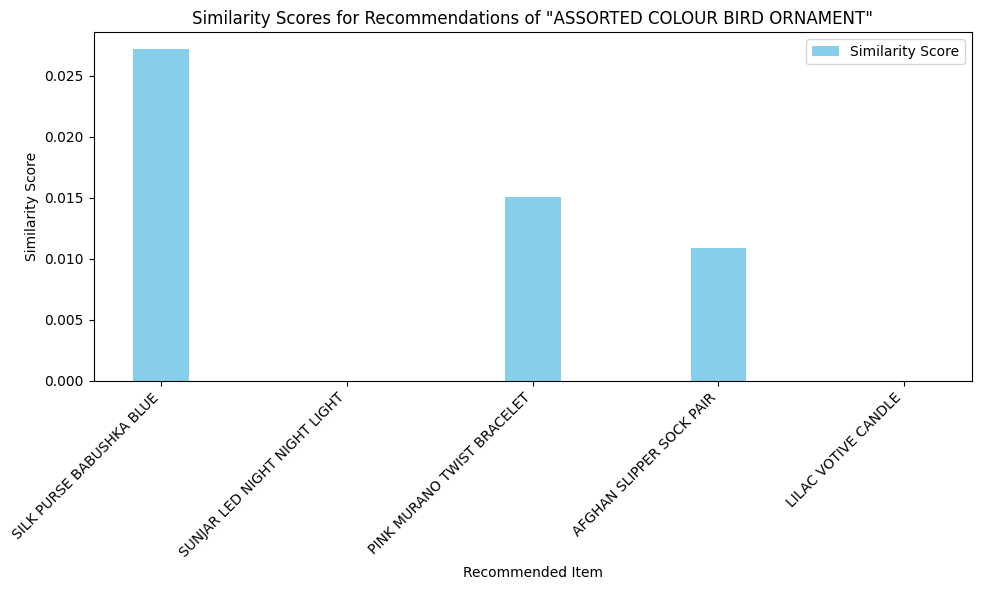

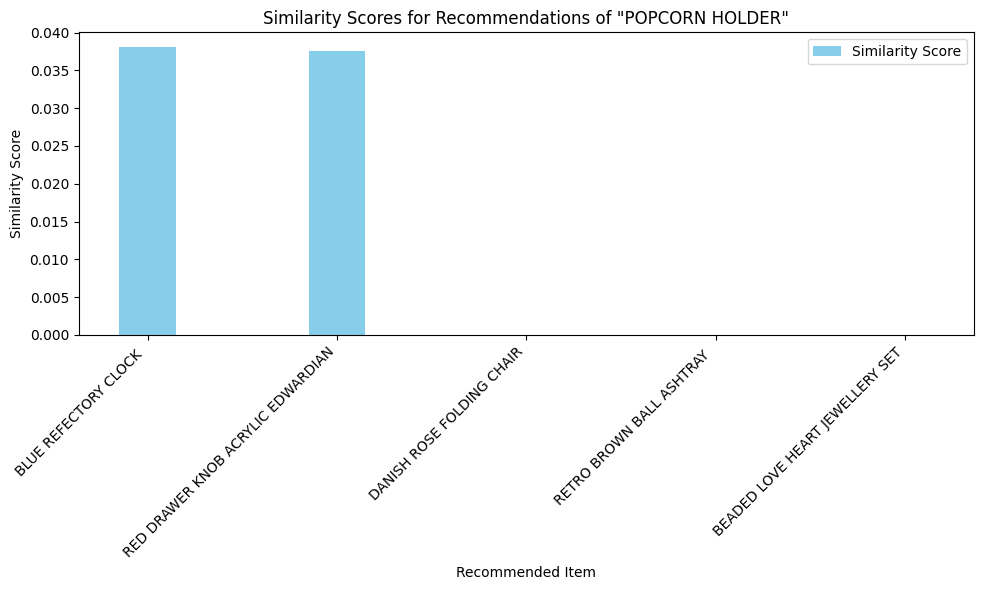

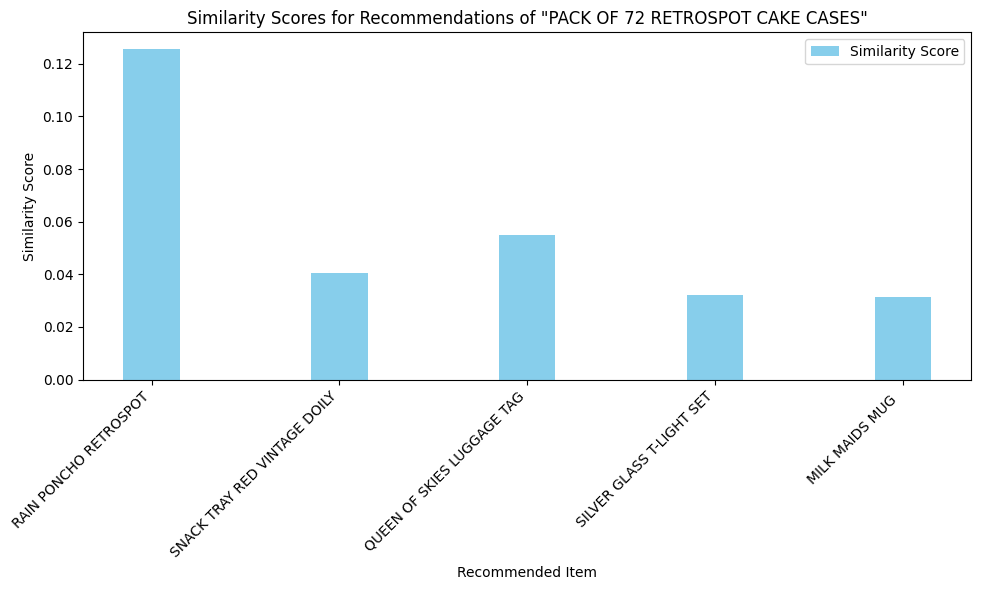

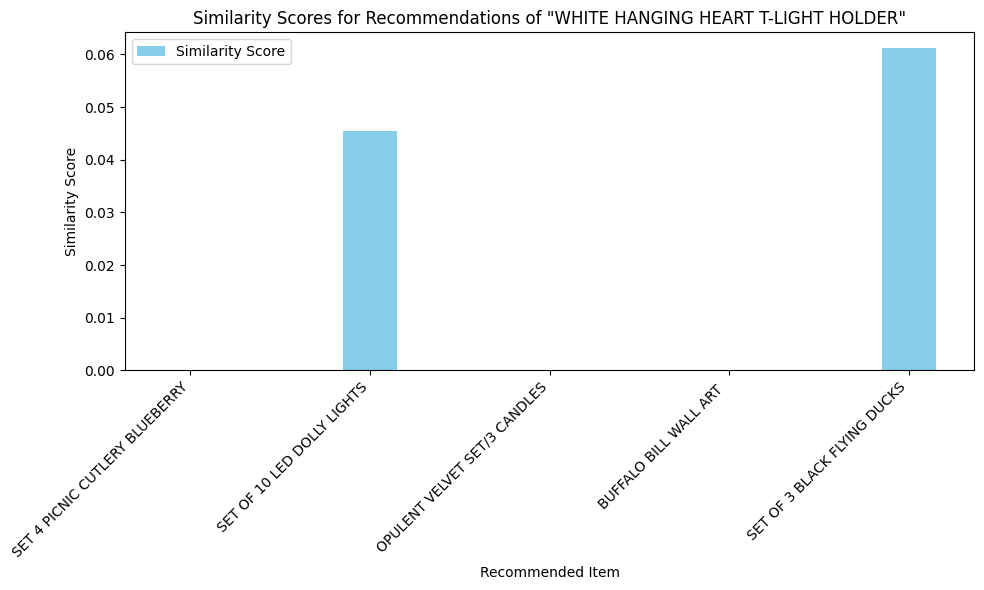

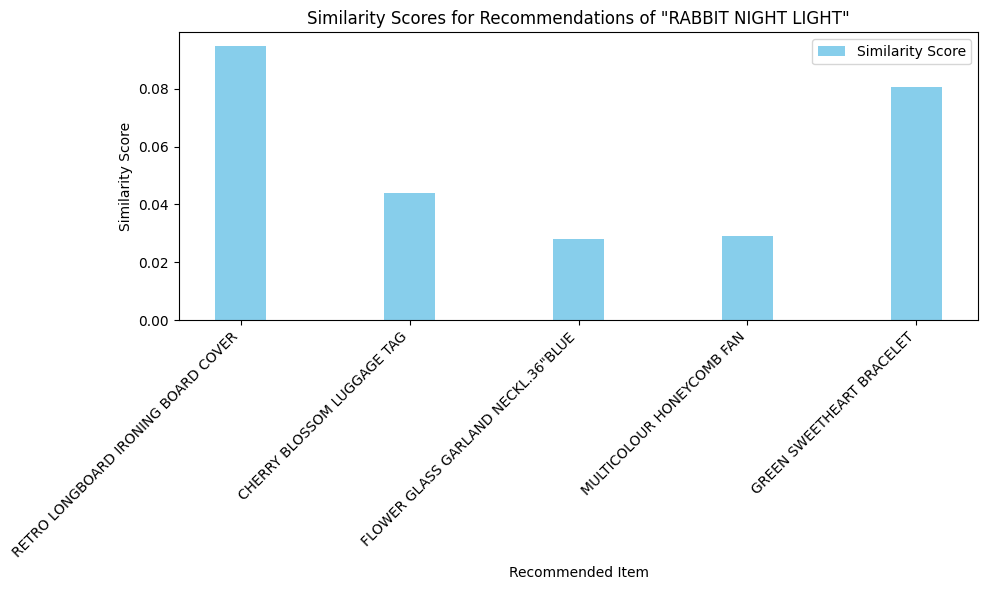

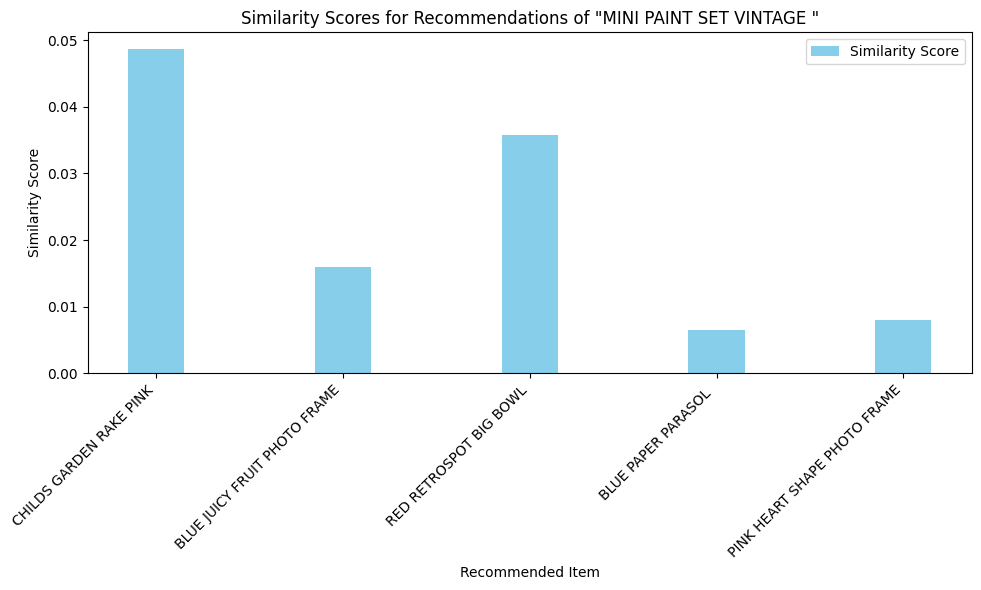

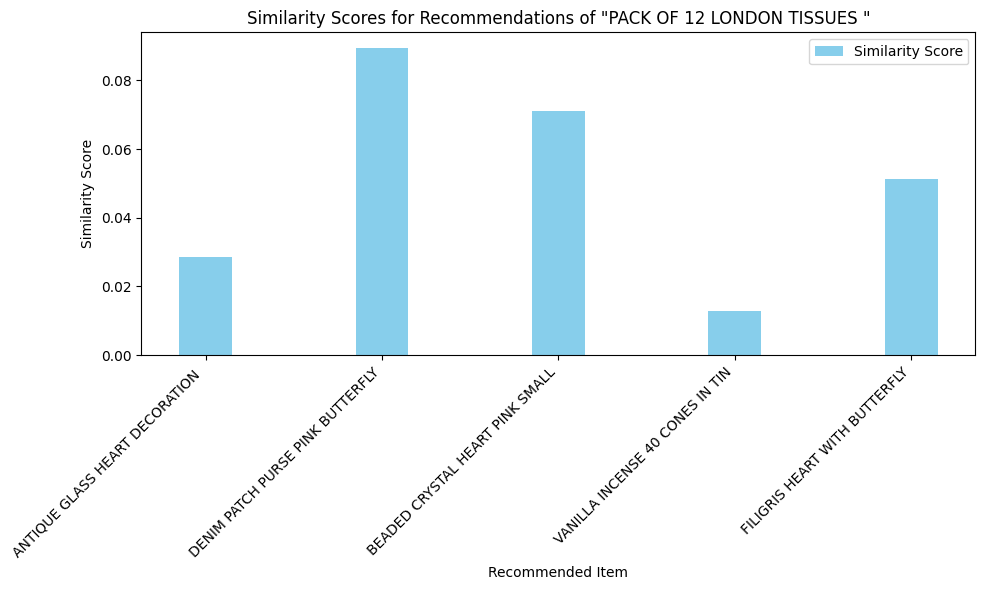

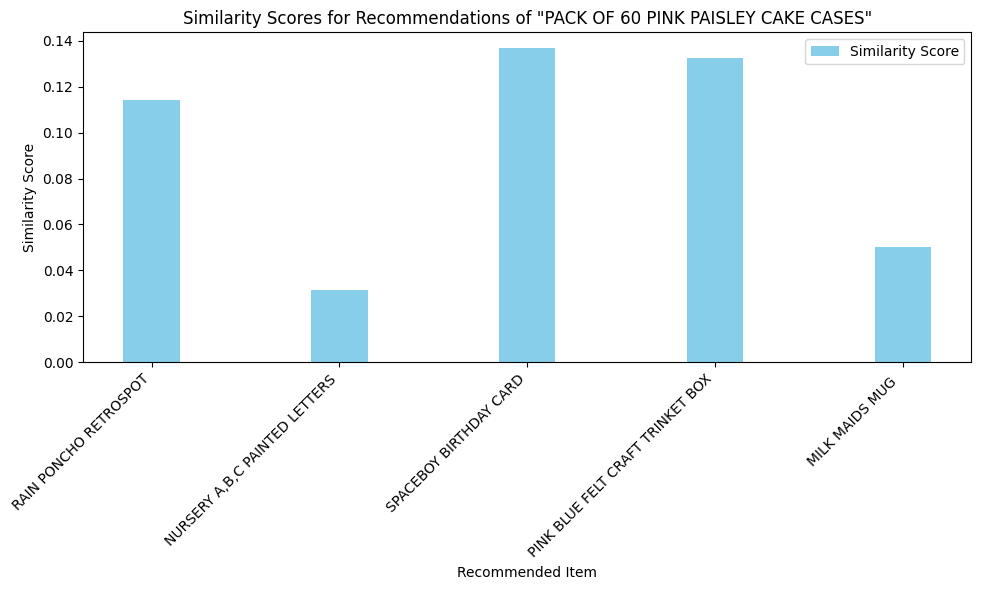

In [0]:
# Define a function to visualize similarity scores for each top selling item and its recommended items
def plot_similarity_scores(top_selling_item, recommendations, similarity_scores):
    plt.figure(figsize=(10, 6))
    index = np.arange(len(recommendations))
    bar_width = 0.3
    
    plt.bar(index, similarity_scores, bar_width, color='skyblue', label='Similarity Score')
    plt.xlabel('Recommended Item')
    plt.ylabel('Similarity Score')
    plt.title(f'Similarity Scores for Recommendations of "{top_selling_item}"')
    plt.xticks(index, recommendations, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualize similarity scores for each top selling item and its recommended items
for top_selling_item, recommendations in top_selling_item_recommendations.items():
    similarity_scores = [item_similarities[top_selling_items[top_selling_items['Description'] == top_selling_item].index[0], 
                                            top_selling_items[top_selling_items['Description'] == recommendation].index[0]]
                         for recommendation in recommendations]
    plot_similarity_scores(top_selling_item, recommendations, similarity_scores)


In [0]:
df.shape

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2450616556192371>:1
----> 1 df.shape

NameError: name 'df' is not defined